In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("Lili.tsv", sep='\t', header=0, quoting=3, encoding='ISO-8859–1')

In [134]:
df.dropna(subset=['score'], inplace=True)

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23147 entries, 478 to 23831
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tconst          23147 non-null  object 
 1   titleType       23147 non-null  object 
 2   primaryTitle    23147 non-null  object 
 3   startYear       23147 non-null  float64
 4   runtimeMinutes  23147 non-null  float64
 5   genres          23147 non-null  object 
 6   averageRating   23147 non-null  float64
 7   numVotes        23147 non-null  float64
 8   tmdbId          23147 non-null  float64
 9   overview        23147 non-null  object 
 10  tmdbVoteAvg     23147 non-null  float64
 11  poster          23147 non-null  object 
 12  score           0 non-null      float64
dtypes: float64(7), object(6)
memory usage: 2.5+ MB


In [129]:
df.columns

Index(['tconst', 'titleType', 'primaryTitle', 'startYear', 'runtimeMinutes',
       'genres', 'averageRating', 'numVotes', 'tmdbId', 'overview',
       'tmdbVoteAvg', 'poster', 'score'],
      dtype='object')

TitleTypes

In [142]:
print(df['titleType'].unique())

['movie' 'tvSeries' 'tvMiniSeries']


Number of tv series:  3697
Number of movies:  20174


<Axes: xlabel='titleType', ylabel='count'>

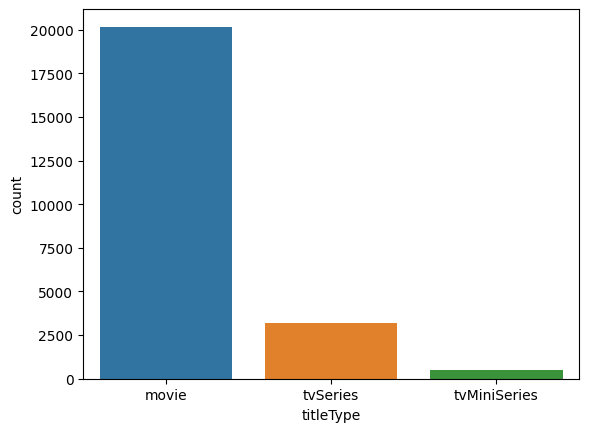

In [57]:
number_of_shows=df.titleType.str.contains('tvSeries').value_counts()[True]+df.titleType.str.contains('tvMiniSeries').value_counts()[True]
number_of_movies=df.titleType.str.contains('movie').value_counts()[True]
print("Number of tv series: ", number_of_shows)
print("Number of movies: ", number_of_movies)
sns.countplot(x ='titleType', data = df) 

startYear

Min:  1914.0
Mean:  2001.8098529596582
Max:  2023.0
Std:  19.501452381583178


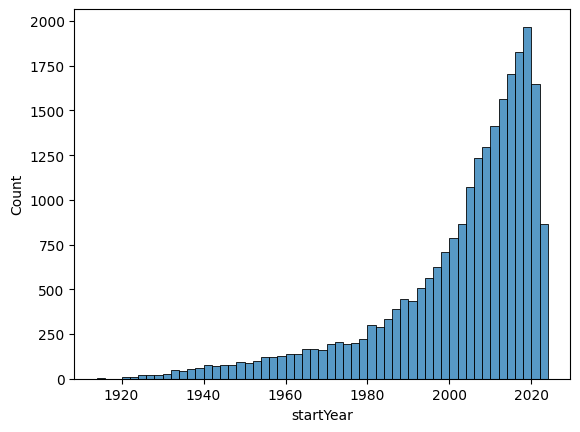

In [58]:
print("Min: ", np.min(df.startYear))
print("Mean: ",np.mean(df.startYear))
print("Max: ", np.max(df.startYear))
print("Std: ", np.std(df.startYear))
sns.histplot(data=df, x="startYear", binwidth=2);

runtimeMinutes  

Mean:  100.33685224749696
Min:  3.0
Max:  400.0
Std:  36.73882425700046


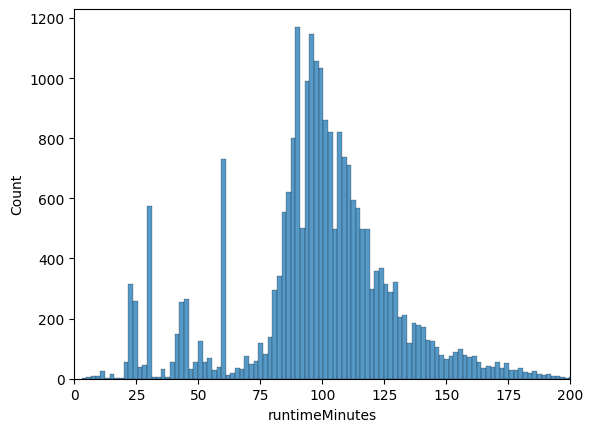

In [59]:
print("Mean: ",np.mean(df.runtimeMinutes))
print("Min: ", np.min(df.runtimeMinutes))
print("Max: ", np.max(df.runtimeMinutes))
print("Std: ", np.std(df.runtimeMinutes))
g=sns.histplot(df, x="runtimeMinutes");
g.set_xlim(0, 200);

In [ ]:
df[df['runtimeMinutes'] >= 300]

Genres

In [143]:
print("Number of genres: ",len(df['genres'].unique()))
print(df['genres'].unique())

Number of genres:  16
['Action' 'Crime' 'Horror' 'Comedy' 'Drama' 'Animation' 'Biography'
 'Adventure' 'Western' 'Fantasy' 'Romance' 'Sci-Fi' 'Mystery' 'Family'
 'Documentary' 'Game-Show']


In [144]:
df.groupby(['genres'])['genres'].count()

genres
Action         4790
Adventure      1568
Animation       314
Biography      1207
Comedy         6121
Crime          2180
Documentary     506
Drama          4962
Family           24
Fantasy         119
Game-Show        67
Horror         1105
Mystery          86
Romance          29
Sci-Fi           28
Western          41
Name: genres, dtype: int64

In [133]:
df.groupby(['startYear'])['startYear'].count()

startYear
1914.0      2
1915.0      1
1916.0      1
1919.0      1
1920.0      4
         ... 
2019.0    972
2020.0    836
2021.0    808
2022.0    787
2023.0     79
Name: startYear, Length: 108, dtype: int64

averageRating

Mean:  6.620602026291552
Min:  1.0
Max:  9.5
Std:  1.1227864477735474


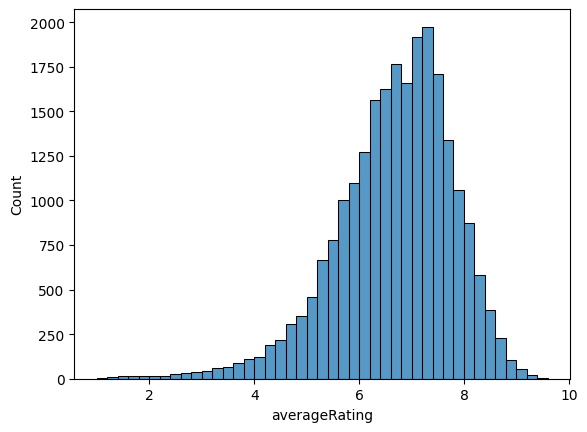

In [15]:
print("Mean: ",np.mean(df.averageRating))
print("Min: ", np.min(df.averageRating))
print("Max: ", np.max(df.averageRating))
print("Std: ", np.std(df.averageRating))
sns.histplot(data=df, x="averageRating", binwidth=0.2);

numVotes

Mean:  45654.94591305807
Min:  3390.0
Max:  2720167.0
Std:  119708.25008098423


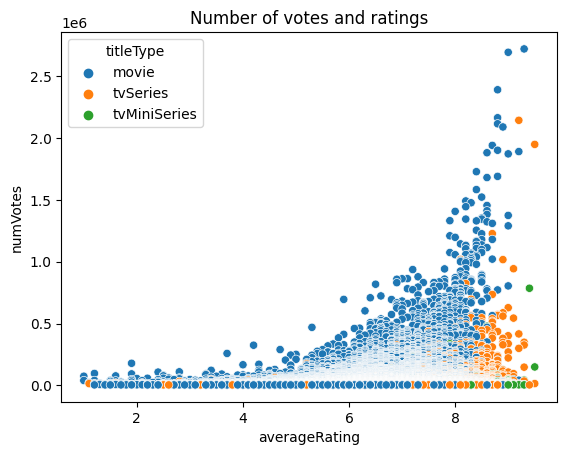

In [3]:
print("Mean: ",np.mean(df.numVotes))
print("Min: ", np.min(df.numVotes))
print("Max: ", np.max(df.numVotes))
print("Std: ", np.std(df.numVotes))
#sns.displot(df.numVotes);
sns.scatterplot(data=df, y="numVotes", x="averageRating", hue="titleType");

plt.title("Number of votes and ratings");

In [14]:
(df.averageRating>9).sum()

112

In [6]:
df.groupby('titleType')['numVotes'].mean()

titleType
movie           48240.485408
tvMiniSeries    18476.378378
tvSeries        33647.696462
Name: numVotes, dtype: float64

In [5]:
df.groupby('titleType')['averageRating'].mean()

titleType
movie           6.470608
tvMiniSeries    7.445946
tvSeries        7.436892
Name: averageRating, dtype: float64

tmdbVoteAvg

In [7]:
df.groupby('titleType')['tmdbVoteAvg'].mean()

titleType
movie           6.454006
tvMiniSeries    7.234456
tvSeries        7.352583
Name: tmdbVoteAvg, dtype: float64

Mean:  6.003374104237016
Min:  0.5
Max:  10.0
Std:  1.3787062949573992


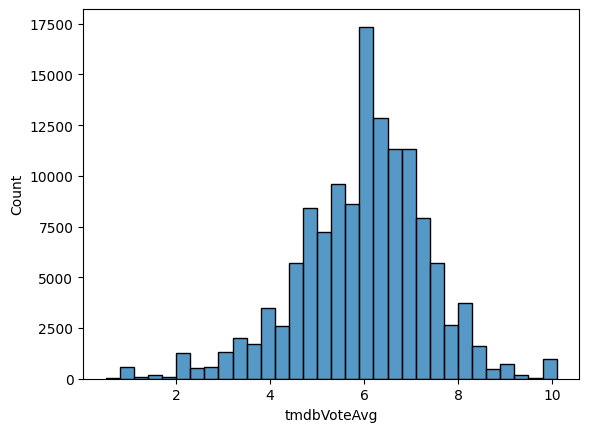

In [15]:
print("Mean: ",np.mean(df.tmdbVoteAvg))
print("Min: ", np.min(df.tmdbVoteAvg))
print("Max: ", np.max(df.tmdbVoteAvg))
print("Std: ", np.std(df.tmdbVoteAvg))
sns.histplot(data=df, x="tmdbVoteAvg", binwidth=0.3);

poster

In [16]:
print("Number of posters missing: ",len(df[df['poster'].str.contains('None')]))

Number of posters missing:  0


In [7]:
df

,tconst,titleType,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,tmdbId,overview,tmdbVoteAvg,poster,score
0,tt0111161,movie,The Shawshank Redemption,1994.0,142.0,Drama,9.3,2720167.0,278.0,Framed in the 1940s for the double murder of h...,8.702,https://www.themoviedb.org/t/p/w600_and_h900_b...,0.0
1,tt0468569,movie,The Dark Knight,2008.0,152.0,Action,9.0,2692950.0,155.0,Batman raises the stakes in his war on crime. ...,8.500,https://www.themoviedb.org/t/p/w600_and_h900_b...,1.0
2,tt1375666,movie,Inception,2010.0,148.0,Action,8.8,2389916.0,27205.0,"Cobb, a skilled thief who commits corporate es...",8.362,https://www.themoviedb.org/t/p/w600_and_h900_b...,1.0
3,tt0137523,movie,Fight Club,1999.0,139.0,Drama,8.8,2163634.0,550.0,A ticking-time-bomb insomniac and a slippery s...,8.432,https://www.themoviedb.org/t/p/w600_and_h900_b...,1.0
4,tt0944947,tvSeries,Game of Thrones,2011.0,57.0,Action,9.2,2142962.0,1399.0,Seven noble families fight for control of the ...,8.400,https://www.themoviedb.org/t/p/w600_and_h900_b...,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23881,tt0790799,movie,$9.99,2008.0,78.0,Animation,6.7,3390.0,19311.0,Have you ever wondered What is the meaning of ...,5.900,https://www.themoviedb.org/t/p/w600_and_h900_b...,NaN
23882,tt0486480,movie,Silk,2006.0,108.0,Horror,6.4,3390.0,25875.0,A scientist uses his invention - the Menger Sp...,6.200,https://www.themoviedb.org/t/p/w600_and_h900_b...,NaN
23883,tt13482828,movie,One Fine Morning,2022.0,112.0,Romance,7.0,3000.0,747779.0,With a father suffering from neurodegenerative...,6.800,https://www.themoviedb.org/t/p/w600_and_h900_b...,0.0
23884,tt8205028,movie,The Story of My Wife,2021.0,169.0,Drama,6.3,2200.0,574078.0,"Jacob StÃ¶rr, a sea captain, makes a bet in a ...",6.000,https://www.themoviedb.org/t/p/w600_and_h900_b...,1.0


Scores

In [8]:
number_of_likes=(df.score>0).sum()
number_of_dislikes=(df.score==0).sum()
print("Liked: ", number_of_likes)
print("Disliked: ", number_of_dislikes)

Liked:  419
Disliked:  379


In [9]:
df.iloc[:,-1:]=np.nan

In [126]:
df.to_csv('Lili.tsv', sep="\t", index=False)